In [1]:
library(Seurat)

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

Attaching SeuratObject


Attaching package: ‘Seurat’


The following object is masked from ‘package:base’:

    %||%




In [2]:
library(ggplot2)

In [3]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [11]:
library(pheatmap)

In [3]:
library('RColorBrewer')

In [6]:
pre <- readRDS('./10X/10x_all.rds')

In [7]:
post <- readRDS('./10x_filt_lab_cor.rds')

In [23]:
oocyte_cells <- colnames(subset(post, idents = "Oocyte"))

# Get %mito information for these cells from pre and post objects
pre_mito <- FetchData(object = pre, vars = "percent.mt", cells = oocyte_cells)
post_mito <- FetchData(object = post, vars = "percent.mt", cells = oocyte_cells)

# Combine data into a dataframe
plot_data <- data.frame(
  Cell = rep(oocyte_cells, 2),
  MitoPercent = c(pre_mito$percent.mt, post_mito$percent.mt),
  Condition = rep(c("Pre", "Post"), each = length(oocyte_cells))
)

# Plot using ggplot2
violin_plot <- ggplot(plot_data, aes(x = Condition, y = MitoPercent, fill = Condition)) +
  geom_violin(trim = FALSE, alpha = 0.6) +
  geom_jitter(width = 0.1, size = 0.8, alpha = 0.8) +
  labs(title = "Mitochondrial Percentage in Oocyte Cells", y = "% Mitochondrial", x = "Condition") +
  theme_minimal()

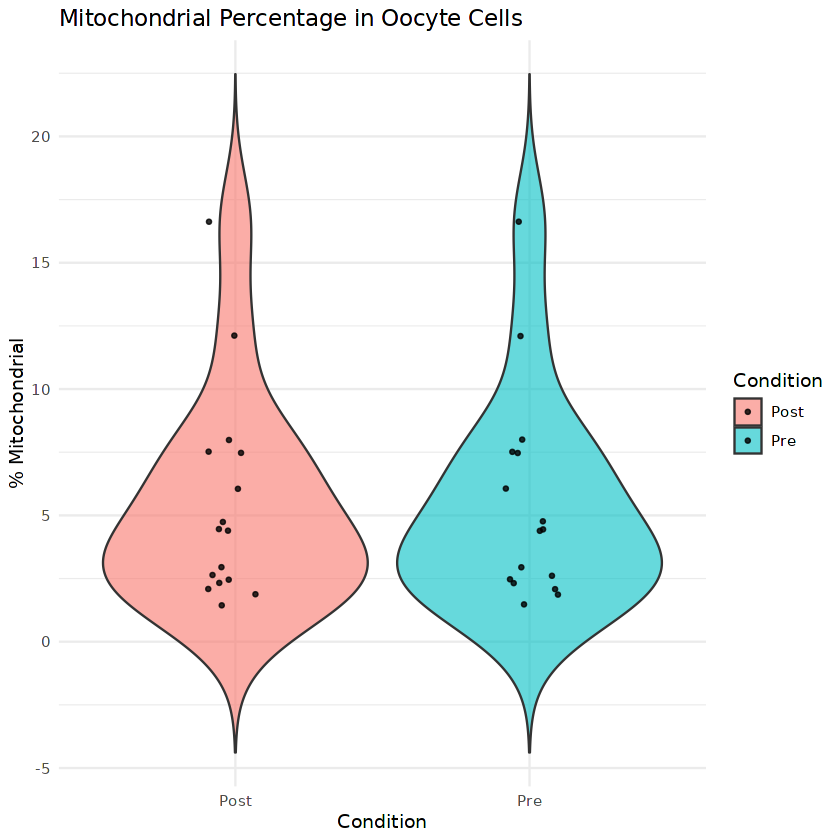

In [25]:
violin_plot
ggsave(filename = "violin_plot.pdf", plot = violin_plot, width = 8, height = 6)

In [19]:
missing_cells <- oocyte_cells[!oocyte_cells %in% colnames(pre)]
length(missing_cells)  # Number of cells not found in pre

[1] 0

In [21]:
pre[['percent.mt']] <- PercentageFeatureSet(pre, pattern = '^mt-')

In [4]:
alldata.filt <- readRDS('./10x_final_0811.rds')

In [12]:
Idents(alldata.filt)<-'subcluster'

In [13]:
Idents(alldata.theca)<-'subcluster'

In [7]:
alldata.theca <- subset(alldata.filt, idents = c('Theca_12','Theca_00',
                                                 'Theca_mix', 'Theca_04'))

In [32]:
unique(alldata.filt@meta.data$subcluster)

[1] "Granulosa 3"       "Stroma 1"          "Granulosa 1"      
 [4] "Myeloid"           "Epithelial"        "Endothelial 1"    
 [7] "Granulosa 2"       "Endothelial 2"     "Oocyte"           
[10] "Stroma 2"          "Cumulus 1"         "Cumulus 2"        
[13] "Luteal Cells"      "Mitotic Antral"    "Rubbish"          
[16] "Active CL"         "Luteinizing Mural" "Theca_00"         
[19] "Theca_12"          "Theca_mix"         "Theca_04"

In [8]:
metadata <- alldata.theca@meta.data

# Update the subcluster values
metadata$subcluster <- gsub("^Theca_00$", "Theca_00_A", metadata$subcluster)
metadata$subcluster <- gsub("^Theca_mix$", "Theca_00_B", metadata$subcluster)

# Assign the updated metadata back to the Seurat object
alldata.theca@meta.data <- metadata

# Verify the changes
head(alldata.theca@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,percent_mito,percent_ribo,RNA_snn_res.0.1,seurat_clusters,pANN_0.25_0.09_1390,DF.classifications_0.25_0.09_1390,⋯,timepoints,timep,woo,woo1,final_cluster,final_abbr,ff_names,orig.ident2,subcluster,top_cluster
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,⋯,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
0h_ABC_AAAGAACTCAAATGCC-1,0_ABC,9473,3183,7.948907,7.948907,0,1,1,0.2272182,Singlet,⋯,00hrs,0,9,9,9,9,Theca 1,00_ABC,Theca_00_A,Theca
0h_ABC_AAAGAACTCGAGAATA-1,0_ABC,20809,4588,10.322457,10.322457,0,1,1,0.2652878,Singlet,⋯,00hrs,0,9,9,9,9,Theca 1,00_ABC,Theca_00_A,Theca
0h_ABC_AAAGGATGTGGTTTAC-1,0_ABC,18874,3864,4.132669,4.132669,0,1,1,0.1759592,Singlet,⋯,00hrs,0,9,9,9,9,Theca 1,00_ABC,Theca_00_A,Theca
0h_ABC_AAAGGATTCGGTTGTA-1,0_ABC,9089,3168,10.595225,10.595225,0,1,1,0.2374101,Singlet,⋯,00hrs,0,9,9,9,9,Theca 1,00_ABC,Theca_00_A,Theca
0h_ABC_AAAGGGCCAATGAGCG-1,0_ABC,20439,4179,10.582710,10.582710,0,1,1,0.2236211,Singlet,⋯,00hrs,0,9,9,9,9,Theca 1,00_ABC,Theca_00_A,Theca
0h_ABC_AAAGTGAAGGGTTGCA-1,0_ABC,29594,5586,2.885720,2.885720,0,0,0,0.3024580,Singlet,⋯,00hrs,0,9,9,9,9,Theca 1,00_ABC,Theca_12,Theca


In [14]:
de_results <- FindMarkers(alldata.theca, ident.1 = "Theca_00_A", ident.2 = "Theca_00_B")

In [15]:
write.csv(de_results[order(de_results$avg_log2FC,decreasing = TRUE),],
          file = "theca00avb.csv", row.names = TRUE)

character(0)

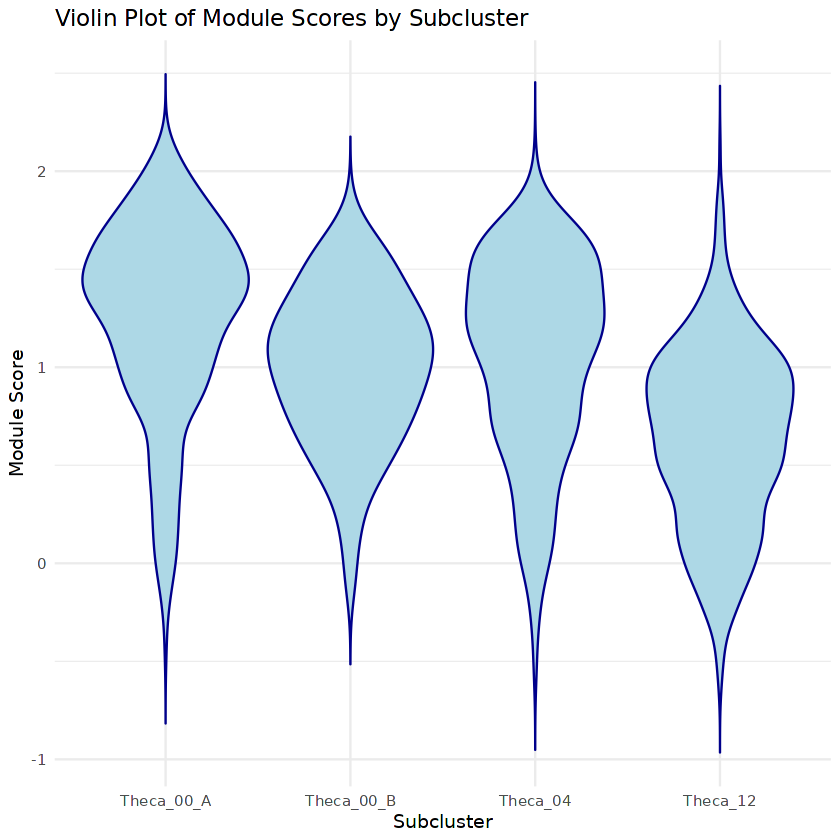

In [45]:
gene_list <- c("Mgarp", "Aldh1a1", "Cyp17a1", "Cyp11a1", "Fdx1", "Hao2", 
               "Folr1", "Acsbg1", "Serpina5", "Dnajc15")

# Convert to list as required by AddModuleScore
genes <- list(gene_list)

# Add module scores to Seurat object (use your object's name: alldata.theca)
alldata.theca <- AddModuleScore(
  object = alldata.theca,
  features = genes,
  name = "ModuleScore"
)

# Create a violin plot for module scores across subclusters
ggplot(alldata.theca@meta.data, aes(x = subcluster, y = ModuleScore1)) +
  geom_violin(trim = FALSE, fill = "lightblue", color = "darkblue") +
  #geom_jitter(width = 0.2, size = 0.5, alpha = 0.5) + # Add individual data points
  theme_minimal() +
  labs(title = "Violin Plot of Module Scores by Subcluster", 
       y = "Module Score", 
       x = "Subcluster")

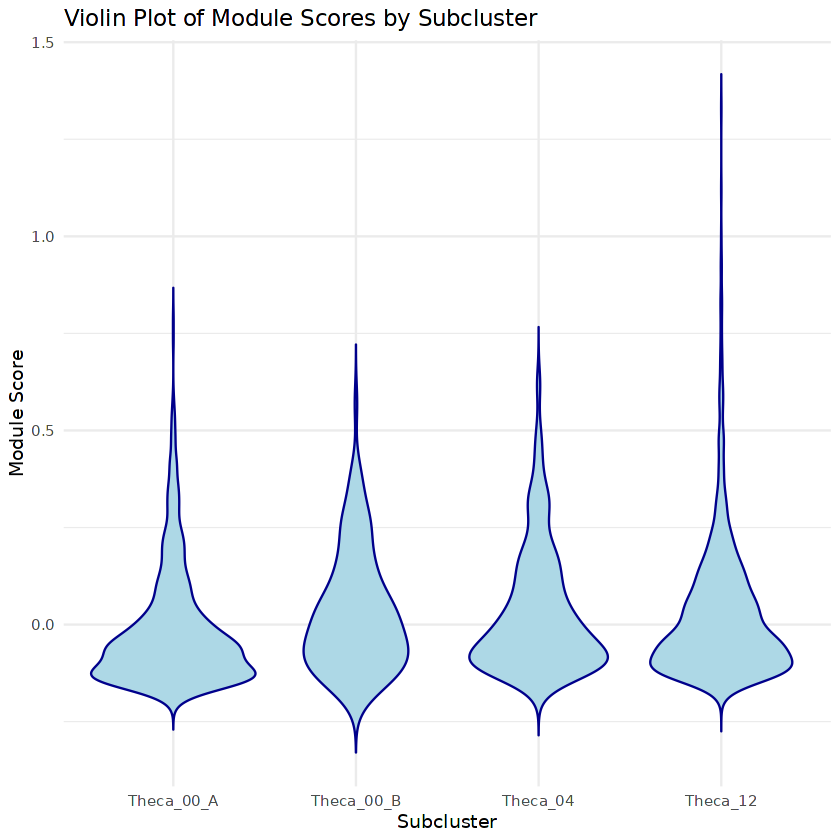

In [46]:
gene_list <- c("Enpep", "Adcy7", "Thbd", "Mest", "Stmn1", "Mycn", 
               "Hhip", "Lamc3", "Hmgb2", "Top2a")

# Convert to list as required by AddModuleScore
genes <- list(gene_list)

# Add module scores to Seurat object (use your object's name: alldata.theca)
alldata.theca <- AddModuleScore(
  object = alldata.theca,
  features = genes,
  name = "ModuleScore"
)

# Create a violin plot for module scores across subclusters
ggplot(alldata.theca@meta.data, aes(x = subcluster, y = ModuleScore1)) +
  geom_violin(trim = FALSE, fill = "lightblue", color = "darkblue") +
  #geom_jitter(width = 0.2, size = 0.5, alpha = 0.5) + # Add individual data points
  theme_minimal() +
  labs(title = "Violin Plot of Module Scores by Subcluster", 
       y = "Module Score", 
       x = "Subcluster")

In [93]:
Idents(alldata.endo) <-'ff_names'

In [94]:
de_results <- FindMarkers(alldata.endo, ident.1 = "Endothelial 1", ident.2 = "Endothelial 2")

In [19]:
gene_list <- c("Flit1", "Rbp1", "Ctdla2", "Sparc", "Slco2a1",
                "Igfbp7", "Cd34", "Lyc6", "Esam", "Insr",
                "Slc39a8", "Fam167b", "Nr1", "Mecom", "Ptgr",
              "Ccl21a", "Mmrn1", "Reln", "Lyvel", "Fgfr1",
                "Prox1", "Aqp1", "Lcn2", "Cp", "Flt4",
                "Scn3a", "Pard6g", "Angpt2", "Fxyd6", "Tc2n")


In [20]:
subset_seurat_obj <- subset(alldata.endo, features = gene_list)
data_subset <- as.matrix(subset_seurat_obj@assays$RNA@scale.data)
data_subset_t = t(data_subset)
data_subset_t <- data_subset_t/2

my_colour = list(
    top_cluster = c('Endothelial 1' = "#E00689", 'Endothelial 2' = "#952584"),
    timepoints = c('00hrs' = "#B3B3B3", '04hrs' = "#737373",'12hrs' = "#262626"))
df <- data.frame(
  row.names = rownames(subset_seurat_obj@meta.data),
  timepoints = subset_seurat_obj@meta.data$timepoints,
  top_cluster = subset_seurat_obj@meta.data$ff_names
)

# Print the dataframe
print(df)

                          timepoints   top_cluster
0h_ABC_AAAGGATCAATAGGGC-1      00hrs Endothelial 1
0h_ABC_AACCAACTCCTCAGAA-1      00hrs Endothelial 1
0h_ABC_AAGACTCAGTAACGTA-1      00hrs Endothelial 1
0h_ABC_AAGGAATCAGCGGTTC-1      00hrs Endothelial 2
0h_ABC_AAGTACCCAACACTAC-1      00hrs Endothelial 1
0h_ABC_AATAGAGAGACAACTA-1      00hrs Endothelial 2
0h_ABC_AATCACGGTCACCTTC-1      00hrs Endothelial 1
0h_ABC_AATTCCTAGGAGAGGC-1      00hrs Endothelial 1
0h_ABC_AATTTCCGTTAAGGGC-1      00hrs Endothelial 1
0h_ABC_ACACTGACAGAGTTCT-1      00hrs Endothelial 2
0h_ABC_ACCACAAAGCGTATGG-1      00hrs Endothelial 1
0h_ABC_ACCATTTGTTACACTG-1      00hrs Endothelial 1
0h_ABC_ACCTGAACAAGGCCTC-1      00hrs Endothelial 1
0h_ABC_ACGATCAGTGTACATC-1      00hrs Endothelial 1
0h_ABC_ACGATGTAGAGTCTGG-1      00hrs Endothelial 1
0h_ABC_ACGATGTGTTAAGGGC-1      00hrs Endothelial 1
0h_ABC_ACGGTCGAGGCGTTAG-1      00hrs Endothelial 1
0h_ABC_ACGTCCTCAATTGTGC-1      00hrs Endothelial 2
0h_ABC_ACTACGAGTCGGAACA-1      

character(0)

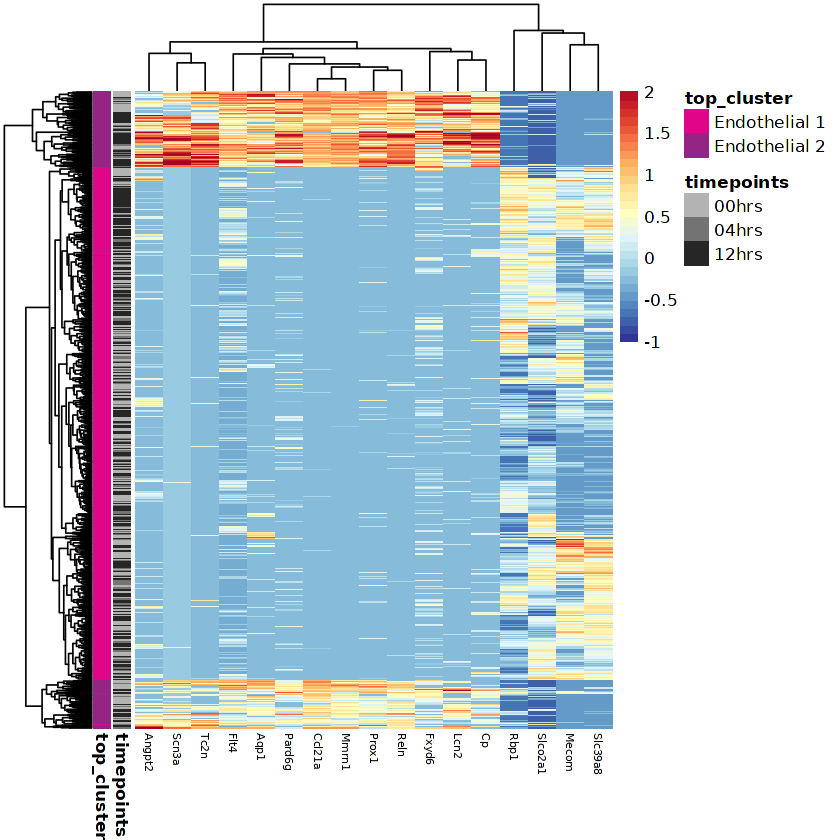

In [21]:
breaksList = seq(-1, 2, by = 0.1)

#pdf('cc_dea_0818.png')
# plot matrix2 with new range
#pheatmap(CorMatrix2,
#color = colorRampPalette(rev(brewer.pal(n = 7, name = "RdYlBu")))(length(breaksList)),
#breaks = breaksList)

my_pheatmap <- pheatmap(data_subset_t,cluster_rows = TRUE,
         cluster_cols = TRUE,show_rownames = FALSE,annotation_row = df,annotation_colors = my_colour,
                       fontsize_col = 6,color = colorRampPalette(rev(brewer.pal(n = 11, name = "RdYlBu")))(length(breaksList)),
breaks = breaksList
                       )
#dev.off()
ggsave(filename = "endoheatmap.pdf", plot =my_pheatmap , width = 8, height = 6)
system(paste0("gsutil cp endoheatmap.pdf gs://fc-4526162f-e4bf-4e1f-8e93-50b9e28e7006/10X_dataset/"), intern=TRUE)

In [109]:
data_subset_t

,Prox1,Lcn2,Scn3a,Cp,Mecom,Slc39a8,Ccl21a,Reln,Aqp1,Mmrn1,Angpt2,Fxyd6,Rbp1,Slco2a1,Flt4,Tc2n,Pard6g
0h_ABC_AAAGGATCAATAGGGC-1,-0.23695280,-0.2113006,-0.1896381,-0.23177280,-0.248785798,-0.487887074,-0.2376227,-0.2272199,-0.04403585,-0.2339754,-0.008880913,0.43498012,0.63832204,-0.42151656,-0.38917766,-0.2006176,-0.25885823
0h_ABC_AACCAACTCCTCAGAA-1,-0.23695280,-0.2113006,-0.1896381,-0.23177280,0.634595199,-0.487887074,-0.2376227,-0.2272199,-0.24942436,-0.2339754,-0.258313375,-0.29964980,-0.14574093,0.47019283,-0.38917766,-0.2006176,-0.25885823
0h_ABC_AAGACTCAGTAACGTA-1,-0.23695280,-0.2113006,-0.1896381,-0.23177280,-0.077528948,-0.487887074,-0.2376227,-0.2272199,-0.24942436,-0.2339754,-0.258313375,-0.29964980,0.41640081,0.57437358,-0.38917766,-0.2006176,0.22594744
0h_ABC_AAGGAATCAGCGGTTC-1,1.22444048,1.6632125,0.4335145,1.08662361,-0.455051913,-0.487887074,1.4375751,0.9109259,0.68532586,1.3386429,-0.258313375,1.75136051,-0.28784717,-0.71241142,1.46342563,0.8506278,0.35625860
0h_ABC_AAGTACCCAACACTAC-1,-0.23695280,-0.2113006,-0.1896381,-0.23177280,-0.016268721,0.527331073,-0.2376227,-0.2272199,-0.24942436,-0.2339754,-0.258313375,-0.29964980,-0.61471105,0.20175747,-0.38917766,-0.2006176,-0.25885823
0h_ABC_AATAGAGAGACAACTA-1,-0.23695280,-0.2113006,-0.1896381,0.64419815,-0.455051913,-0.487887074,1.0128636,0.4021658,1.30024403,0.8003224,-0.258313375,0.39296665,-0.38418234,-0.71241142,1.01338995,0.2732561,0.45707111
0h_ABC_AATCACGGTCACCTTC-1,-0.23695280,-0.2113006,-0.1896381,-0.23177280,0.261832182,0.714951254,-0.2376227,-0.2272199,-0.24942436,-0.2339754,-0.258313375,-0.29964980,-0.61471105,0.30190511,-0.38917766,-0.2006176,-0.25885823
0h_ABC_AATTCCTAGGAGAGGC-1,-0.23695280,-0.2113006,0.3003066,-0.23177280,-0.455051913,-0.487887074,-0.2376227,-0.2272199,-0.24942436,-0.2339754,-0.258313375,-0.29964980,0.15250562,0.19137479,0.25847148,-0.2006176,-0.25885823
0h_ABC_AATTTCCGTTAAGGGC-1,-0.23695280,-0.2113006,-0.1896381,-0.23177280,-0.163982456,-0.487887074,-0.2376227,-0.2272199,-0.24942436,-0.2339754,-0.258313375,-0.29964980,0.13711804,-0.19658075,-0.38917766,-0.2006176,0.37061734
0h_ABC_ACACTGACAGAGTTCT-1,1.32203480,0.5517232,1.6559399,1.26474614,-0.455051913,-0.487887074,1.4258224,1.5425249,1.86893081,1.5958628,0.098930067,1.41065323,-0.61471105,-0.71241142,1.26586160,1.9457850,1.45130368


In [99]:
write.csv(de_results[order(de_results$avg_log2FC,decreasing = TRUE),],
          file = "endo1v2.csv", row.names = TRUE)
system(paste0("gsutil cp endo1v2.csv gs://fc-4526162f-e4bf-4e1f-8e93-50b9e28e7006/10X_dataset/"), intern=TRUE)

In [100]:
system(paste0("gsutil cp endo1v2.csv gs://fc-4526162f-e4bf-4e1f-8e93-50b9e28e7006/10X_dataset/"), intern=TRUE)

character(0)

In [98]:
de_results[order(de_results$avg_log2FC,decreasing = TRUE),]

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Flt1,1.254764e-104,2.831393,0.981,0.090,4.051005e-100
Rbp1,7.741126e-52,2.341434,0.857,0.354,2.499223e-47
Ctla2a,7.255675e-60,2.312931,0.981,0.873,2.342495e-55
Sparc,4.363180e-88,2.255947,1.000,0.939,1.408653e-83
Slco2a1,2.730467e-77,2.252867,0.928,0.250,8.815314e-73
Igfbp7,1.135122e-81,2.212056,0.999,0.986,3.664742e-77
Cd34,4.032663e-92,2.169587,0.963,0.189,1.301945e-87
Ly6a,4.076078e-67,2.122067,0.790,0.057,1.315962e-62
Ly6c1,2.093213e-77,2.096707,0.838,0.052,6.757939e-73


In [97]:
head(de_results[order(de_results$avg_log2FC,decreasing = FALSE),],20)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Ccl21a,8.057486e-216,-6.047327,0.020,0.976,2.601359e-211
Mmrn1,4.803857e-228,-3.962150,0.011,0.995,1.550925e-223
Reln,5.532780e-207,-3.472790,0.034,0.976,1.786258e-202
Lyve1,5.791749e-163,-3.133136,0.057,0.887,1.869866e-158
Fgl2,1.500724e-126,-2.938935,0.242,0.976,4.845087e-122
Prox1,6.416508e-184,-2.926615,0.070,0.967,2.071569e-179
Aqp1,2.034689e-157,-2.698609,0.100,0.943,6.568992e-153
Lcn2,4.180056e-164,-2.490781,0.047,0.858,1.349531e-159
Cp,8.149184e-133,-2.301866,0.109,0.868,2.630964e-128


In [14]:
alldata.endo <- subset(alldata.filt, idents = c('Endothelial 1','Endothelial 2'))

In [15]:
alldata.endo <- NormalizeData(alldata.endo)
alldata.endo <- FindVariableFeatures(alldata.endo, selection.method = "vst", nfeatures = 2000)
alldata.endo <- ScaleData(alldata.endo)
alldata.endo <- RunPCA(alldata.endo)
alldata.endo <- FindNeighbors(alldata.endo, dims = 1:20)
alldata.endo <- FindClusters(alldata.endo, resolution = 0.1)
alldata.endo <- RunUMAP(alldata.endo, dims = 1:20)

Centering and scaling data matrix

PC_ 1 
Positive:  Akr1cl, Inha, Bmpr1b, Bex4, Nr5a2, Ptprd, Sema5a, Fst, Sox5, Tceal9 
	   Tenm4, Fam13a, Greb1, Tox2, Greb1l, Prkar2b, Ano4, Lama1, Ank3, Esr2 
	   Gramd1b, Enah, Tnni3, Serpine2, Grem2, Kcnq5, Aff2, Zfp385b, Socs2, Fshr 
Negative:  Cavin2, Rhoj, Selenop, Stab1, Flt4, Ldb2, Myzap, Prex2, Nrp2, Tgfbr2 
	   Galnt18, Vav3, Tbx1, Scn1b, Gmfg, Plvap, Mmrn1, Prox1, Gpm6a, Tc2n 
	   Klhl4, Zfp521, Aqp1, Reln, Kctd12, Thy1, Maf, Ccl21a, Scn5a, Gm525 
PC_ 2 
Positive:  Ly6c1, Ctla2a, Slco2a1, Ly6a, Rbp1, Adgrl2, Selenoh, Slc39a8, Mecom, Sema6d 
	   Tmem252, 2610203C22Rik, Itga2, Adamts9, Igfbp3, Abcb1a, Ptp4a3, Nes, Pcdh17, Akr1b8 
	   Sox17, Tnik, Slc6a6, Kcnq1, Plcb1, Sox11, Fam181b, Cdk1, Cd300lg, Lrrc3b 
Negative:  Reln, Mmrn1, Ccl21a, Prox1, Pard6g, Fgl2, Gpm6a, Ctnnal1, Pcsk6, Rnase4 
	   Aqp1, Tc2n, Cp, Plce1, Tbx1, Zfpm2, Lyve1, Ank2, Lcn2, Fmnl2 
	   Ssbp2, Nr3c2, Scn3a, Ltbp4, Mir99ahg, Il7, Prkcz, Prkag2, Ctdspl, Mpp7 
PC_ 3 
Positi

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1103
Number of edges: 34685

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9515
Number of communities: 4
Elapsed time: 0 seconds


22:45:43 UMAP embedding parameters a = 0.9922 b = 1.112

22:45:43 Read 1103 rows and found 20 numeric columns

22:45:43 Using Annoy for neighbor search, n_neighbors = 30

22:45:43 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

22:45:44 Writing NN index file to temp file /tmp/Rtmpy1SSat/file6d40b45031

22:45:44 Searching Annoy index using 1 thread, search_k = 3000

22:45:44 Annoy recall = 100%

22:45:44 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

22:45:45 Initializing from normalized Laplacian + noise (using irlba)

22:45:45 Commencing optimization for 500 epochs, with 42562 positive edges

22:45:46 Optimization finished



In [16]:
Idents(alldata.endo) <-'ff_names'

In [18]:
endoumap <- DimPlot(alldata.endo, reduction = "umap",pt.size = 2, cols = c('#E00689','#952584'))#+ NoLegend()
ggsave(filename = "endoumap.pdf", plot =endoumap , width = 8, height = 6)
system(paste0("gsutil cp endoumap.pdf gs://fc-4526162f-e4bf-4e1f-8e93-50b9e28e7006/10X_dataset/"), intern=TRUE)

character(0)

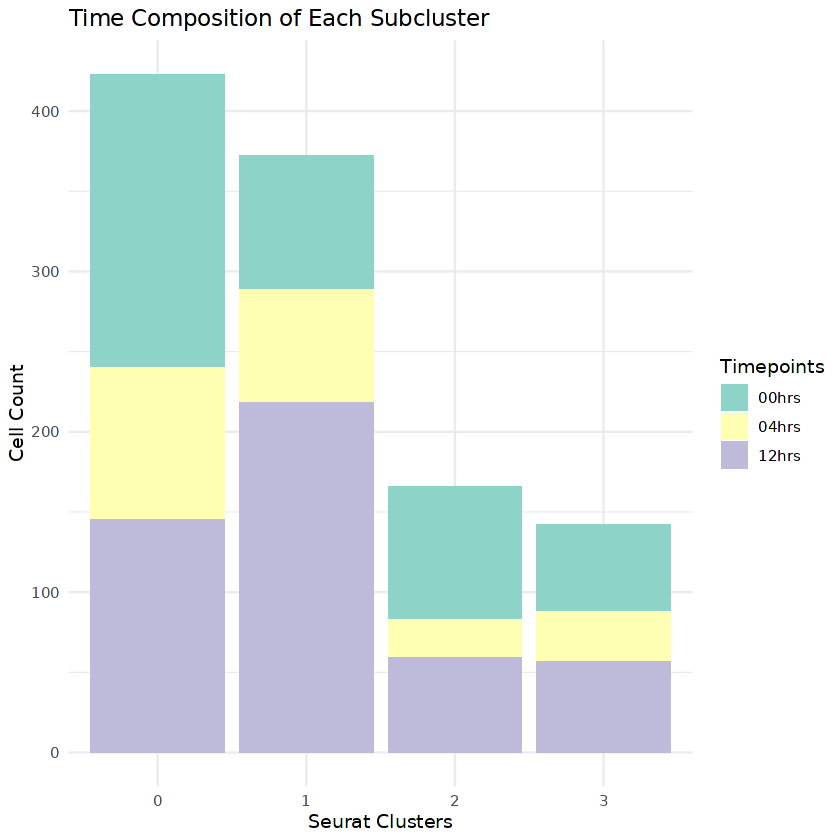

In [82]:
metadata <- alldata.endo@meta.data

# Summarize the data
summary_data <- metadata %>%
  group_by(seurat_clusters, timepoints) %>%
  summarise(cell_count = n(), .groups = 'drop') # Summarize the count of cells

# Create the stacked bar plot
ggplot(summary_data, aes(x = factor(seurat_clusters), y = cell_count, fill = timepoints)) +
  geom_bar(stat = "identity") + # Stacked by default
  theme_minimal() +
  labs(title = "Time Composition of Each Subcluster",
       x = "Seurat Clusters",
       y = "Cell Count",
       fill = "Timepoints") +
  scale_fill_brewer(palette = "Set3") # Optional: Set a color palette

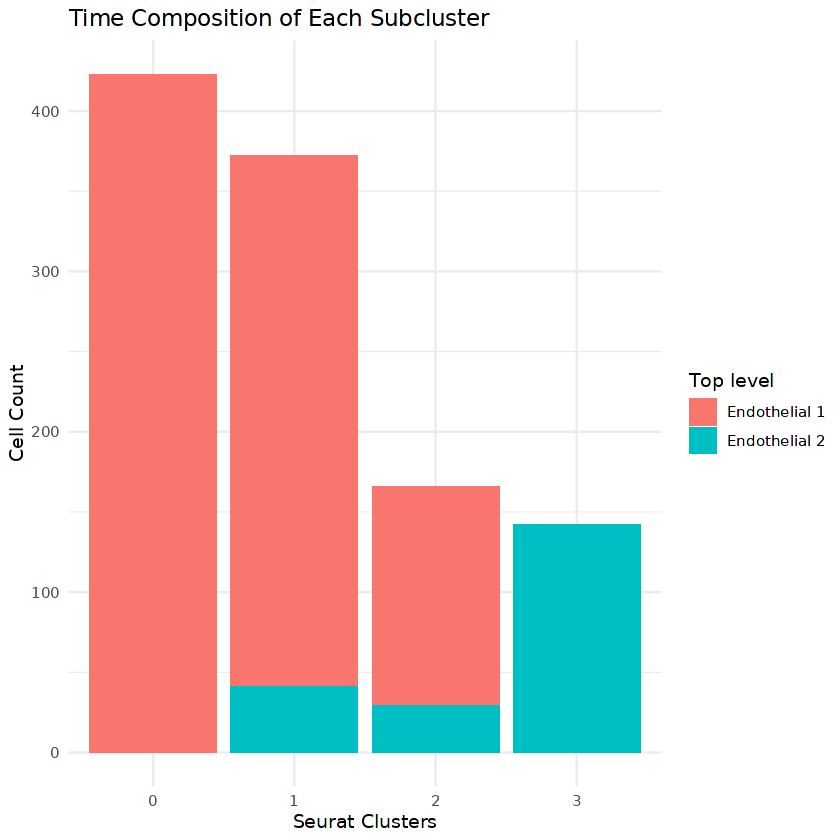

In [91]:
metadata <- alldata.endo@meta.data

# Summarize the data
summary_data <- metadata %>%
  group_by(seurat_clusters, subcluster) %>%
  summarise(cell_count = n(), .groups = 'drop') # Summarize the count of cells

# Create the stacked bar plot
ggplot(summary_data, aes(x = factor(seurat_clusters), y = cell_count, fill = subcluster)) +
  geom_bar(stat = "identity") + # Stacked by default
  theme_minimal() +
  labs(title = "Time Composition of Each Subcluster",
       x = "Seurat Clusters",
       y = "Cell Count",
       fill = "Top level")

In [83]:
cluster0.markers <- FindMarkers(alldata.endo, ident.1 = 0, min.pct = 0.25)
cluster1.markers <- FindMarkers(alldata.endo, ident.1 = 1, min.pct = 0.25)
cluster2.markers <- FindMarkers(alldata.endo, ident.1 = 2, min.pct = 0.25)
cluster3.markers <- FindMarkers(alldata.endo, ident.1 = 3, min.pct = 0.25)

In [84]:
head(cluster0.markers[order(cluster0.markers$avg_log2FC,decreasing = TRUE),],20)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Ctla2a,1.011296e-87,1.696313,0.998,0.937,3.264968e-83
Flt1,4.562354e-97,1.471356,1.000,0.691,1.472956e-92
Igfbp3,2.548297e-18,1.381733,0.511,0.313,8.227176e-14
Smarca2,1.323363e-71,1.256316,0.986,0.919,4.272476e-67
Rbp1,3.547955e-20,1.250181,0.846,0.707,1.145457e-15
Slco2a1,2.439395e-63,1.228023,0.955,0.700,7.875585e-59
Cd34,6.627960e-89,1.222122,0.995,0.701,2.139837e-84
Clec14a,5.040479e-72,1.189760,0.910,0.615,1.627319e-67
Plpp1,1.315100e-59,1.189578,0.974,0.871,4.245800e-55


In [85]:
head(cluster1.markers[order(cluster1.markers$avg_log2FC,decreasing = TRUE),],20)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Spp1,1.529864e-20,2.796598,0.462,0.209,4.939165e-16
Acta2,4.306180e-60,2.685960,0.675,0.242,1.390250e-55
Fdx1,1.257409e-43,2.650454,0.968,0.910,4.059545e-39
Tagln,1.285618e-47,2.475586,0.599,0.218,4.150618e-43
Mt1,4.089037e-51,2.372640,0.884,0.601,1.320146e-46
Cyp11a1,1.168446e-19,2.317233,0.825,0.639,3.772327e-15
Mrap,4.525931e-81,2.275436,0.798,0.301,1.461197e-76
Pcsk5,4.729063e-78,2.193930,0.847,0.371,1.526778e-73
Ephx2,3.582154e-24,2.182730,0.739,0.490,1.156499e-19


In [86]:
head(cluster2.markers[order(cluster2.markers$avg_log2FC,decreasing = TRUE),],20)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Inha,1.005982e-85,3.379251,1.000,0.699,3.247813e-81
Inhba,7.299921e-11,2.571900,0.639,0.436,2.356780e-06
Prkar2b,7.140849e-79,2.535256,0.988,0.527,2.305423e-74
Ptprd,2.162208e-81,2.487197,0.988,0.425,6.980687e-77
Fam13a,1.504646e-114,2.444837,0.922,0.176,4.857751e-110
Bmpr1b,2.885883e-110,2.441613,0.988,0.259,9.317073e-106
Ano4,4.817782e-95,2.437769,0.904,0.205,1.555421e-90
Bex4,1.952761e-94,2.403633,0.982,0.323,6.304489e-90
Tanc2,4.480215e-80,2.389847,0.994,0.613,1.446437e-75


In [87]:
head(cluster3.markers[order(cluster3.markers$avg_log2FC,decreasing = TRUE),],20)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Ccl21a,3.166841e-152,4.729294,0.986,0.088,1.022415e-147
Mmrn1,7.418136e-162,3.759140,1.000,0.082,2.394945e-157
Reln,1.507596e-144,3.446709,0.979,0.102,4.867274e-140
Lyve1,3.788143e-119,3.149922,0.915,0.113,1.223002e-114
Fgl2,4.474673e-90,2.985578,0.979,0.296,1.444648e-85
Prox1,6.072167e-133,2.935180,0.986,0.132,1.960399e-128
Aqp1,1.508456e-119,2.776250,0.979,0.156,4.870050e-115
Lcn2,7.948466e-124,2.550769,0.901,0.100,2.566162e-119
Cp,7.884872e-97,2.431390,0.887,0.161,2.545631e-92


In [5]:
alldata.mye <- subset(alldata.filt, idents = c('Myeloid'))

In [6]:
alldata.mye <- NormalizeData(alldata.mye)
alldata.mye <- FindVariableFeatures(alldata.mye, selection.method = "vst", nfeatures = 2000)
alldata.mye <- ScaleData(alldata.mye)
alldata.mye <- RunPCA(alldata.mye)
alldata.mye <- FindNeighbors(alldata.mye, dims = 1:20)
alldata.mye <- FindClusters(alldata.mye, resolution = 0.1)
alldata.mye <- RunUMAP(alldata.mye, dims = 1:20)

Centering and scaling data matrix

PC_ 1 
Positive:  Tshz2, Pbx1, Cped1, Bnc2, Col1a2, Cald1, Nr2f2, Igfbp7, Sparc, Auts2 
	   Dlc1, Sox5, Col3a1, Bicc1, Rbms3, Lama2, Zeb1, Ptprk, Tpm1, Fbn1 
	   Fbxl7, Col6a1, Zbtb20, Rora, Col4a1, Pard3b, Kcnt2, Cdh11, Egfr, Itih5 
Negative:  Cd68, Ftl1, Lgals3, Fth1, Ctss, Ctsb, Trem2, Ctsd, Lyz2, Wfdc17 
	   Plin2, Pf4, H2afz, Capg, Ccl6, Gngt2, Pclaf, Ccl9, Cst3, Syngr1 
	   Prdx1, Hmgb2, Birc5, Mki67, Cd36, Cbr2, Folr2, Cdca8, Spc24, Kif15 
PC_ 2 
Positive:  Inha, Bex4, Fst, Serpine2, Spsb1, Map1b, Gramd1b, Inhba, Nr5a2, Tox2 
	   Gja1, Prkar2b, Tmsb15b2, Bmpr1b, Bmp3, Adgrv1, Nap1l5, Crim1, Jam2, Socs2 
	   Arhgap28, Ephx2, Igf1r, Cyb5a, Chst8, Cdh2, Gch1, Mast4, Hsd17b1, Bmpr2 
Negative:  Col1a2, Igfbp7, Col3a1, Dcn, Rbp1, Bgn, Bicc1, Col1a1, Mdk, Lama2 
	   Cald1, Eva1b, Fbn1, Pdgfra, Nr2f2, Igfbp4, Cdh11, Tcf21, Mgp, Igfbp6 
	   Cygb, Cped1, Nid1, Lum, Col4a1, Col6a1, Fhl2, Sparcl1, Arhgap24, Selenop 
PC_ 3 
Positive:  Mrap, Star, Ybx1, Ereg

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 816
Number of edges: 25016

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9472
Number of communities: 3
Elapsed time: 0 seconds


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
22:26:21 UMAP embedding parameters a = 0.9922 b = 1.112

22:26:21 Read 816 rows and found 20 numeric columns

22:26:21 Using Annoy for neighbor search, n_neighbors = 30

22:26:21 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

22:26:22 Writing NN index file to temp file /tmp/Rtmpy1SSat/file6d3c3726e

22:26:22 Searching Annoy index using 1 thread, search_k = 3000

22:26:22 Annoy recall = 100%

22:26:22 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30


In [13]:
myeumap <- DimPlot(alldata.mye, reduction = "umap",pt.size = 2,cols = c("#277257", "#dc546d", '#54b9e5'))#+ NoLegend()
ggsave(filename = "myeumap.pdf", plot =myeumap , width = 8, height = 6)
system(paste0("gsutil cp myeumap.pdf gs://fc-4526162f-e4bf-4e1f-8e93-50b9e28e7006/10X_dataset/"), intern=TRUE)

character(0)

In [ ]:
DimPlot(alldata.mye, reduction = "umap",shape.by = 'timepoints',pt.size = 2)#+ NoLegend()

In [13]:
alldata.mye@meta.data

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,percent_mito,percent_ribo,RNA_snn_res.0.1,seurat_clusters,pANN_0.25_0.09_1390,DF.classifications_0.25_0.09_1390,⋯,timepoints,timep,woo,woo1,final_cluster,final_abbr,ff_names,orig.ident2,subcluster,top_cluster
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<chr>,⋯,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
0h_ABC_AAACGCTAGACCAACG-1,0_ABC,15313,4365,3.715797,3.715797,0,0,0,0.2332134,Singlet,⋯,00hrs,0,12,12,12,12,Myeloid,00_ABC,Myeloid,Myeloid
0h_ABC_AAAGGTAGTATCGATC-1,0_ABC,11986,4138,6.082096,6.082096,0,2,2,0.2829736,Singlet,⋯,00hrs,0,12,12,12,12,Myeloid,00_ABC,Myeloid,Myeloid
0h_ABC_AACCATGTCCCGTTCA-1,0_ABC,13540,3630,2.245199,2.245199,0,1,1,0.2739808,Singlet,⋯,00hrs,0,12,12,12,12,Myeloid,00_ABC,Myeloid,Myeloid
0h_ABC_AACCCAAGTACTGTTG-1,0_ABC,14008,4701,5.332667,5.332667,0,2,2,0.3372302,Singlet,⋯,00hrs,0,12,12,12,12,Myeloid,00_ABC,Myeloid,Myeloid
0h_ABC_AACCTGACATGTAACC-1,0_ABC,128459,10375,7.435836,7.435836,0,0,0,0.3848921,Singlet,⋯,00hrs,0,12,12,12,12,Myeloid,00_ABC,Myeloid,Myeloid
0h_ABC_AACCTTTTCAGAGCGA-1,0_ABC,35786,6845,4.487789,4.487789,0,2,2,0.3648082,Singlet,⋯,00hrs,0,12,12,12,12,Myeloid,00_ABC,Myeloid,Myeloid
0h_ABC_AACGGGAAGCGAATGC-1,0_ABC,11492,4013,5.012182,5.012182,0,0,0,0.2497002,Singlet,⋯,00hrs,0,12,12,12,12,Myeloid,00_ABC,Myeloid,Myeloid
0h_ABC_AACGTCACAGACCTGC-1,0_ABC,9141,3053,6.399737,6.399737,0,1,1,0.2598921,Singlet,⋯,00hrs,0,12,12,12,12,Myeloid,00_ABC,Myeloid,Myeloid
0h_ABC_AAGAACATCCACCTCA-1,0_ABC,11568,3948,5.895574,5.895574,0,0,0,0.2248201,Singlet,⋯,00hrs,0,12,12,12,12,Myeloid,00_ABC,Myeloid,Myeloid


character(0)

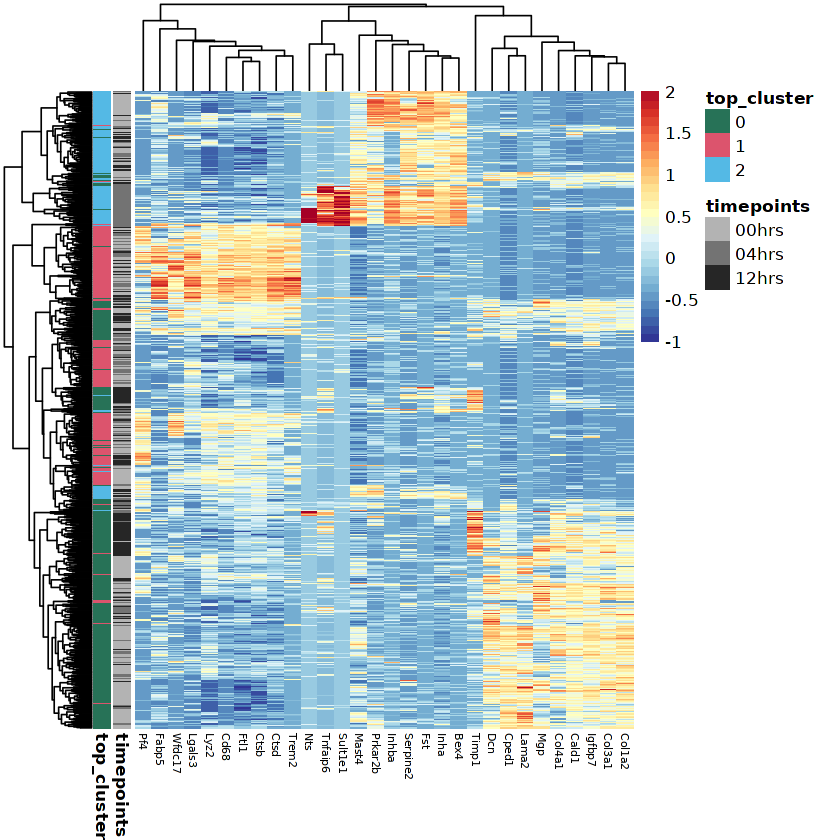

In [12]:
gene_list <- c('Col1a2','Col3a1','Dcn','Mgp','Timp1','Igfbp7','Lama2','Cped1','Cald1','Col4a1',
'Lgals3','Ctsd','Fabp5','Lyz2','Ctsb','Wfdc17','Ftl1','Trem2','Cd68','Pf4',
'Inhba','Sult1e1','Inha','Bex4','Nts','Tnfaip6','Fst','Mast4','Prkar2b','Serpine2')
subset_seurat_obj <- subset(alldata.mye, features = gene_list)
data_subset <- as.matrix(subset_seurat_obj@assays$RNA@scale.data)
data_subset_t = t(data_subset)
data_subset_t <- data_subset_t/2

my_colour = list(
    top_cluster = c('0' = "#277257", '1' = "#dc546d", '2' = '#54b9e5'),
    timepoints = c('00hrs' = "#B3B3B3", '04hrs' = "#737373",'12hrs' = "#262626"))
df <- data.frame(
  row.names = rownames(subset_seurat_obj@meta.data),
  timepoints = subset_seurat_obj@meta.data$timepoints,
  top_cluster = subset_seurat_obj@meta.data$seurat_clusters
)

breaksList = seq(-1, 2, by = 0.1)

#pdf('cc_dea_0818.png')
# plot matrix2 with new range
#pheatmap(CorMatrix2,
#color = colorRampPalette(rev(brewer.pal(n = 7, name = "RdYlBu")))(length(breaksList)),
#breaks = breaksList)

my_pheatmap <- pheatmap(data_subset_t,cluster_rows = TRUE,
         cluster_cols = TRUE,show_rownames = FALSE,annotation_row = df,annotation_colors = my_colour,
                       fontsize_col = 6,color = colorRampPalette(rev(brewer.pal(n = 11, name = "RdYlBu")))(length(breaksList)),
breaks = breaksList
                       )
#dev.off()
ggsave(filename = "myeheatmap.pdf", plot =my_pheatmap , width = 8, height = 6)
system(paste0("gsutil cp myeheatmap.pdf gs://fc-4526162f-e4bf-4e1f-8e93-50b9e28e7006/10X_dataset/"), intern=TRUE)

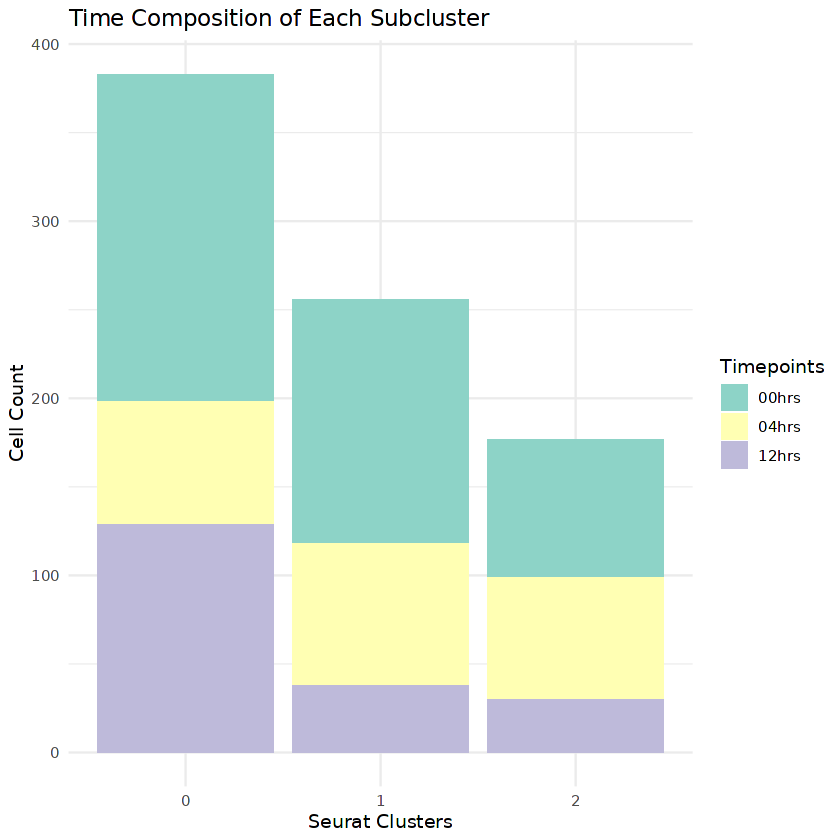

In [78]:
metadata <- alldata.mye@meta.data

# Summarize the data
summary_data <- metadata %>%
  group_by(seurat_clusters, timepoints) %>%
  summarise(cell_count = n(), .groups = 'drop') # Summarize the count of cells

# Create the stacked bar plot
ggplot(summary_data, aes(x = factor(seurat_clusters), y = cell_count, fill = timepoints)) +
  geom_bar(stat = "identity") + # Stacked by default
  theme_minimal() +
  labs(title = "Time Composition of Each Subcluster",
       x = "Seurat Clusters",
       y = "Cell Count",
       fill = "Timepoints") +
  scale_fill_brewer(palette = "Set3") # Optional: Set a color palette